# Scheme Comparison — Spectral Wave Propagation

This notebook compares the performance of different schemes for spectral wave propagation. The schemes are:

1. **Conservative Staggered Scheme**  
   - 2nd-order flux reconstruction  
   - 2nd-order Runge–Kutta time integration

2. **HLLC Scheme**  
   - 5th-order flux reconstruction  
   - 3rd-order Runge–Kutta time integration

3. **Central-Upwind Scheme**  
   - 5th-order flux reconstruction  
   - 3rd-order Runge–Kutta time integration

## Imports

First, we need to set the working directory to the main WavePropError directory to import the `scripts` module.

We import `plotly.io as pio` to save the interactive Plotly plot as an HTML file. The `IPython.display.IFrame` is used to display this HTML file within the documentation, making the interactive plot accessible directly from the Sphinx-generated documentation.

In [1]:
import os

maindir = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
os.chdir(maindir)

from scripts import *
import plotly.io as pio
from IPython.display import IFrame

## User input


In this part, we use the `run_spectral_wave` function to run the wave model for spectral (irregular) wave input.  
This function supports a variety of empirically-based wave spectra, including:

- **JONSWAP**  
- **Pierson–Moskowitz (PM)**  
- **TMA (shallow-water adjusted)**  

The spectral wave input is characterized by key physical parameters such as:

- **Significant wave height** $H_s$  
- **Peak period** $T_p$  
- **Water depth** $d$

### Wave parameters

In [2]:
Hs = 1.0  # Significant wave height [m]
water_depth = 50.0  # Constant water depth [m]
Tp = 15  # Peak wave period [s]
spec_type = jonswap  # Type of input wave spectrum (jonswap, pierson_moskowitz, tma)

### Numerical settings

In [3]:
grid_size = 10  # Size of the grid [m]
domain_size = 15000  # Size of the domain [m]
run_time = 3600 * 2  # Simulation time [s]
dt_output = 0.5  # Output time step [s]
courant_number = 0.5  # Courant number
gauges_location = [500, 10000, 12000]  # Gauges locations [m]

## Model runs

### Conservative Staggered Scheme - 2nd-order

In [4]:
ds_stagg = run_spectral_wave(
    name_run="Conservative_Staggered",
    scheme=conservative_staggered,
    order_reconstruction=2,
    order_time_integration=2,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    spectrum_type=spec_type,
    significant_wave_height=Hs,
    peak_wave_period=Tp,
    run_time=run_time,
    output_interval=run_time,  # we want to save the first and last free surface for the whole domain
    gauges_locations=gauges_location,
    gauges_dt=dt_output,
)

Running Conservative_Staggered...

Input parameters
----------------
Numerical scheme :conservative_staggered
Order of reconstruction :2
Order of RK time integration :2
Courant number :0.5
Grid spacing :10 m
Length of the domain :15000 m
Water depth :50 m
Total computation time :7200 s
Time step for the output :7200 s
Time step for the gauges :0.5 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.0333333                7.75512e-06              3.4483                   
0.0334722                9.05121e-06              4.49367                  
0.0336111                1.05286e-05              3.78727                  
0.03375                  1.22074e-05              3.4236                   
...                      

Computation Progress: 
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 28.7481 s


Reading Conservative_Staggered results and converting to xarray.Dataset...
Done!


### HLLC Scheme - fifth order reconstruction and third order time integration

In [5]:
ds_hllc = run_spectral_wave(
    name_run="HLLC",
    scheme=hllc,
    order_reconstruction=5,
    order_time_integration=3,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    spectrum_type=spec_type,
    significant_wave_height=Hs,
    peak_wave_period=Tp,
    run_time=run_time,
    output_interval=run_time,
    gauges_locations=gauges_location,
    gauges_dt=dt_output,
)

Running HLLC...

Input parameters
----------------
Numerical scheme :hllc
Order of reconstruction :5
Order of RK time integration :3
Courant number :0.5
Grid spacing :10 m
Length of the domain :15000 m
Water depth :50 m
Total computation time :7200 s
Time step for the output :7200 s
Time step for the gauges :0.5 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.0333333                7.75512e-06              3.4483                   
0.0334722                9.05121e-06              4.49367                  
0.0336111                1.05286e-05              3.78727                  
0.03375                  1.22074e-05              3.4236                   
...                      

Computation Progress: 
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 64.881 s


Reading HLLC results and converting to xarray.Dataset...
Done!


### Cemtral-Upwind Scheme - fifth order reconstruction and third order time integration

In [6]:
ds_cu = run_spectral_wave(
    name_run="Central_Upwind",
    scheme=central_upwind,
    order_reconstruction=5,
    order_time_integration=3,
    courant_number=courant_number,
    grid_size=grid_size,
    domain_size=domain_size,
    water_depth=water_depth,
    spectrum_type=spec_type,
    significant_wave_height=Hs,
    peak_wave_period=Tp,
    run_time=run_time,
    output_interval=run_time,
    gauges_locations=gauges_location,
    gauges_dt=dt_output,
)

Running Central_Upwind...

Input parameters
----------------
Numerical scheme :central_upwind
Order of reconstruction :5
Order of RK time integration :3
Courant number :0.5
Grid spacing :10 m
Length of the domain :15000 m
Water depth :50 m
Total computation time :7200 s
Time step for the output :7200 s
Time step for the gauges :0.5 s
frequency [Hz]           amplitude [m]            phase [rad]              
0.0333333                7.75512e-06              3.4483                   
0.0334722                9.05121e-06              4.49367                  
0.0336111                1.05286e-05              3.78727                  
0.03375                  1.22074e-05              3.4236                   
...                      

Computation Progress: 
100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

The numerical simulation took 58.7248 s


Reading Central_Upwind results and converting to xarray.Dataset...
Done!


## Exact Solution

The function `spectral_wave_exact_solution` computes the exact solution of the linear spectral wave propgation based on Nwogu's equation. For more details on the function, please refer to the `scripts` module documentation.

In [7]:
ds_exact = spectral_wave_exact_solution(
    water_depth=water_depth,
    spec_type=spec_type,
    significant_wave_height=Hs,
    peak_wave_period=Tp,
    time=ds_stagg.time.values,
    x=ds_stagg.x.values,
    time_gauges=ds_stagg.time_gauges.values,
    index_gauges=ds_stagg.index_gauges.values,
)

## Plotting

Time series of surface elevation recorded at gauges located at 5 km, 10 km, and 13 km along the domain.

In [8]:
fig = plot_gauges([ds_stagg, ds_hllc, ds_cu], ds_exact)

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.1, xanchor="center", x=0.5),
)

pio.write_html(fig, file="docs/source/_static/test4_time_series.html", auto_open=False)
IFrame(src="../_static/test4_time_series.html", width="100%", height="600px")

## Power Spectrum Density

We compute the power spectrum density (PSD) of the surface elevation time series using the `scipy.signal.welch` function and we compare the results for the three schemes. The PSD is computed using a Hanning window with a segmentation length of  `nperseg = 1024`. Only the portion of the signal after the ramp-up time (`time_ramp = 1200 s`) is considered to ensure the spectrum reflects steady-state wave conditions. The sampling frequency is set as `fs = 1/dt`.

This analysis helps evaluate how well each numerical scheme preserves the spectral energy distribution of the input wave field.


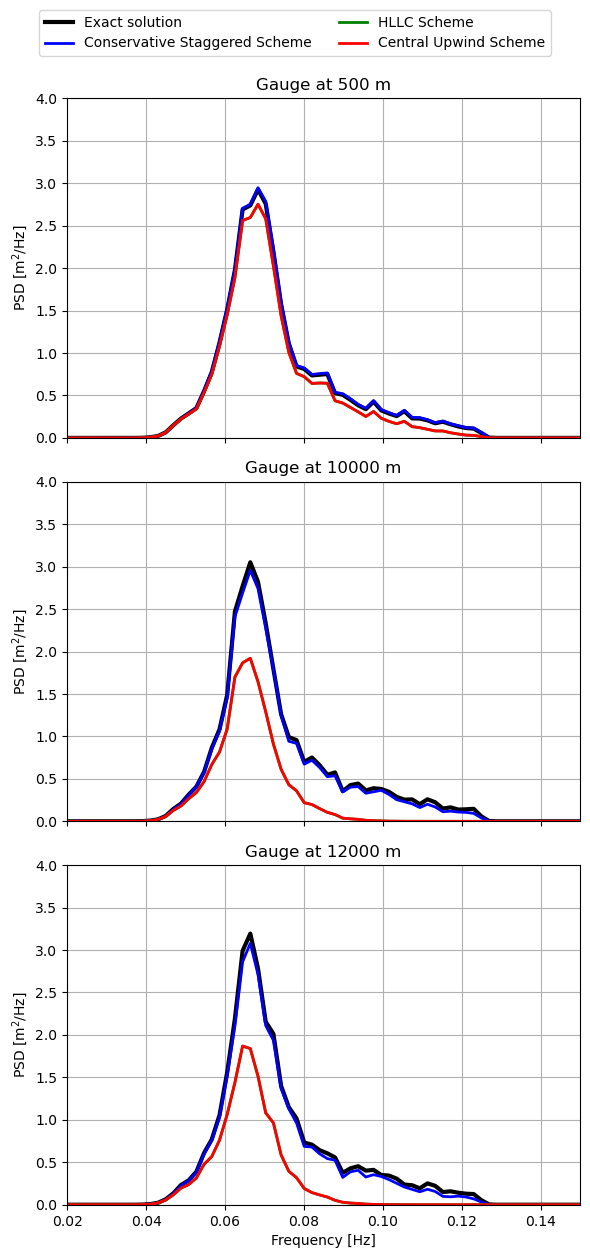

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

time_ramp = 1200
npersg0 = 512 * 2

# Create subplots
fig, axs = plt.subplots(len(gauges_location), 1, figsize=(6, 12), sharex=True)
if len(gauges_location) == 1:
    axs = [axs]  

for iG, ax in enumerate(axs):
    # Get the time series
    time_series_stagg = (
        ds_stagg.eta_gauges.isel(gauges=iG)
        .sel(time_gauges=slice(time_ramp, None))
        .values
    )
    time_series_hllc = (
        ds_hllc.eta_gauges.isel(gauges=iG)
        .sel(time_gauges=slice(time_ramp, None))
        .values
    )
    time_series_cu = (
        ds_cu.eta_gauges.isel(gauges=iG).sel(time_gauges=slice(time_ramp, None)).values
    )
    time_series_exact = (
        ds_exact.eta_gauges.isel(gauges=iG)
        .sel(time_gauges=slice(time_ramp, None))
        .values
    )

    # Sampling frequency
    dt = dt_output
    fs = 1 / dt

    # Welch PSD
    f_stagg, Pxx_stagg = welch(time_series_stagg, fs=fs, nperseg=npersg0)
    f_hllc, Pxx_hllc = welch(time_series_hllc, fs=fs, nperseg=npersg0)
    f_cu, Pxx_cu = welch(time_series_cu, fs=fs, nperseg=npersg0)
    f_exact, Pxx_exact = welch(time_series_exact, fs=fs, nperseg=npersg0)

    # Plot
    ax.plot(f_exact, Pxx_exact, label="Exact solution", color="black", linewidth=3.0)
    ax.plot(
        f_stagg,
        Pxx_stagg,
        label="Conservative Staggered Scheme",
        color="blue",
        linewidth=2.0,
    )
    ax.plot(f_hllc, Pxx_hllc, label="HLLC Scheme", color="green", linewidth=2.0)
    ax.plot(f_cu, Pxx_cu, label="Central Upwind Scheme", color="red", linewidth=2.0)

    ax.set_title(f"Gauge at {gauges_location[iG]} m")
    ax.set_ylabel("PSD [m$^2$/Hz]")
    ax.set_xlim(0.02, 0.15)
    ax.set_ylim(0, 4)
    ax.grid(True)

axs[-1].set_xlabel("Frequency [Hz]")

# Legend 
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05))

fig.tight_layout()
plt.show()